In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
from utils import *
from sklearn import preprocessing as p
import random
import os 
import cv2

val_img = np.load('../all_sites_data_prepared/pics_data/val_img_m1s1.npy')
val_resp = np.load('../all_sites_data_prepared/New_response_data/valRsp_m1s1.npy')
val_img = np.reshape(val_img,(1000,1,50,50))

ATTS = np.load("model1b_atts.npy",allow_pickle=True)

In [28]:
print(len(ATTS))
print(ATTS[0].shape)
print(ATTS[0][0].shape)
print(ATTS[0][0][0].shape)

10
torch.Size([1000, 81, 81])
torch.Size([81, 81])
torch.Size([81])


In [35]:
figure, axis = plt.subplots(10, 10, figsize=(100,100))
for neuron in range(100):
    im = axis[neuron//10,neuron%10].imshow(ATTS[2][neuron].detach().cpu().numpy(), cmap='hot', interpolation='nearest')
    axis[neuron//10,neuron%10].set_title("image number: " + str(neuron))
plt.show()

In [36]:
figure, axis = plt.subplots(10, 10, figsize=(100,100))
for neuron in range(100):
    im = axis[neuron//10,neuron%10].imshow(ATTS[2][neuron][40].detach().cpu().numpy().reshape(9,9), cmap='hot', interpolation='nearest')
    axis[neuron//10,neuron%10].set_title("image number: " + str(neuron))
plt.show()

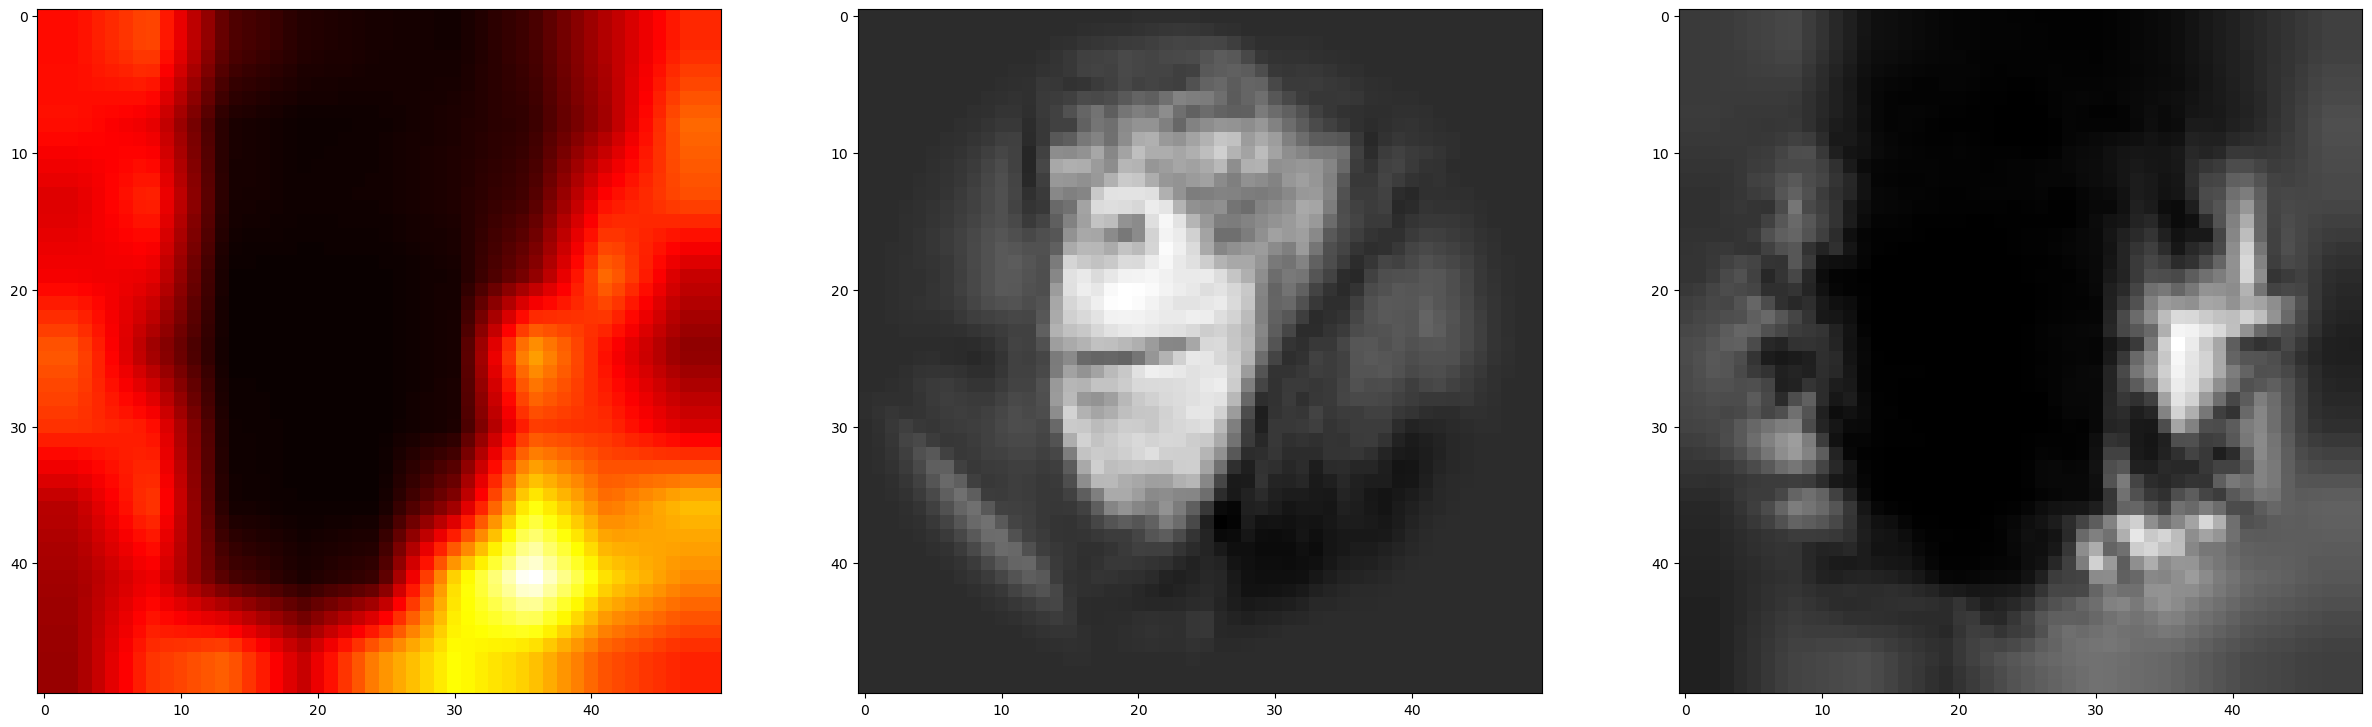

In [25]:
neuron_num = 5
image_num = 996
temp = ATTS[neuron_num][image_num][0].resize(9,9).detach().cpu().numpy()
resized = cv2.resize(temp, dsize=(50, 50), interpolation=cv2.INTER_LINEAR)
figure, axis = plt.subplots(1, 3, figsize=(30,10))

axis[0].imshow(resized,cmap='hot', interpolation='nearest')
axis[1].imshow(val_img[image_num][0],cmap="gray")
temp = val_img[0][0]
temp = np.multiply(temp,resized)
axis[2].imshow(temp,cmap="gray")

plt.show()


